In [1]:
import sys
sys.path.append('../../Codes/lib/')
from functions_1 import*
from functions_2 import*
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from collections import defaultdict
plt.rcParams['text.usetex'] = True
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Immune_system/primary_immune_response/'

%autosave 60

Autosaving every 60 seconds


In [3]:
data = pd.read_excel(Text_files_path + 'data/victora_2020/mmc1.xlsx', header=1, sheet_name = 'Photoactivation CGG')
print(data)
print(data.columns)

     Sequence ID  Figure  Mouse  GC             V          J             D  \
0       PATP7A01       1      1   1     HV1-53*01     HJ4*01      HD3-3*01   
1       PATP7A02       1      1   1     HV1-50*01     HJ4*01      HD1-1*02   
2       PATP7A03       1      1   1     HV1-81*01     HJ2*01      HD3-1*01   
3       PATP7A04       1      1   1     HV1-53*01     HJ2*01      HD1-2*01   
4       PATP7A05       1      1   1     HV1-69*01     HJ3*01      HD3-2*02   
...          ...     ...    ...  ..           ...        ...           ...   
1064    P04H08_1       1     10   2  HV5-6-4*01 F   HJ4*01 F    HD2-4*01 F   
1065    P04H09_1       1     10   2   HV1-12*01 F   HJ3*01 F  HD5-2*01 ORF   
1066    P04H10_1       1     10   2   HV5-17*01 F   HJ4*01 F    HD1-1*02 F   
1067    P04H11_1       1     10   2   HV1-18*01 F   HJ3*01 F    HD1-1*01 F   
1068    P04H12_1       1     10   2   HV1-64*01 F  HJ2*01 F     HD1-1*01 F   

           AA JUNCTION V-Gene (VBASE2):           CDR3:  \
0   

In [4]:
data_early = data.loc[(data['Figure']==1)]
mice = range(1, 11)
gcs = np.arange(1, 3)
S = []
L_act = []
data_dict = dict()
data_cur = np.unique(np.array((list(data_early['CDR3:']))), return_counts = True)
for i in range(len(data_cur[0])):
    data_dict[data_cur[0][i]] = data_cur[1][i]
data_df = pd.DataFrame(data_dict, index=True)
# print(data_df)

TypeError: Index(...) must be called with a collection of some kind, True was passed

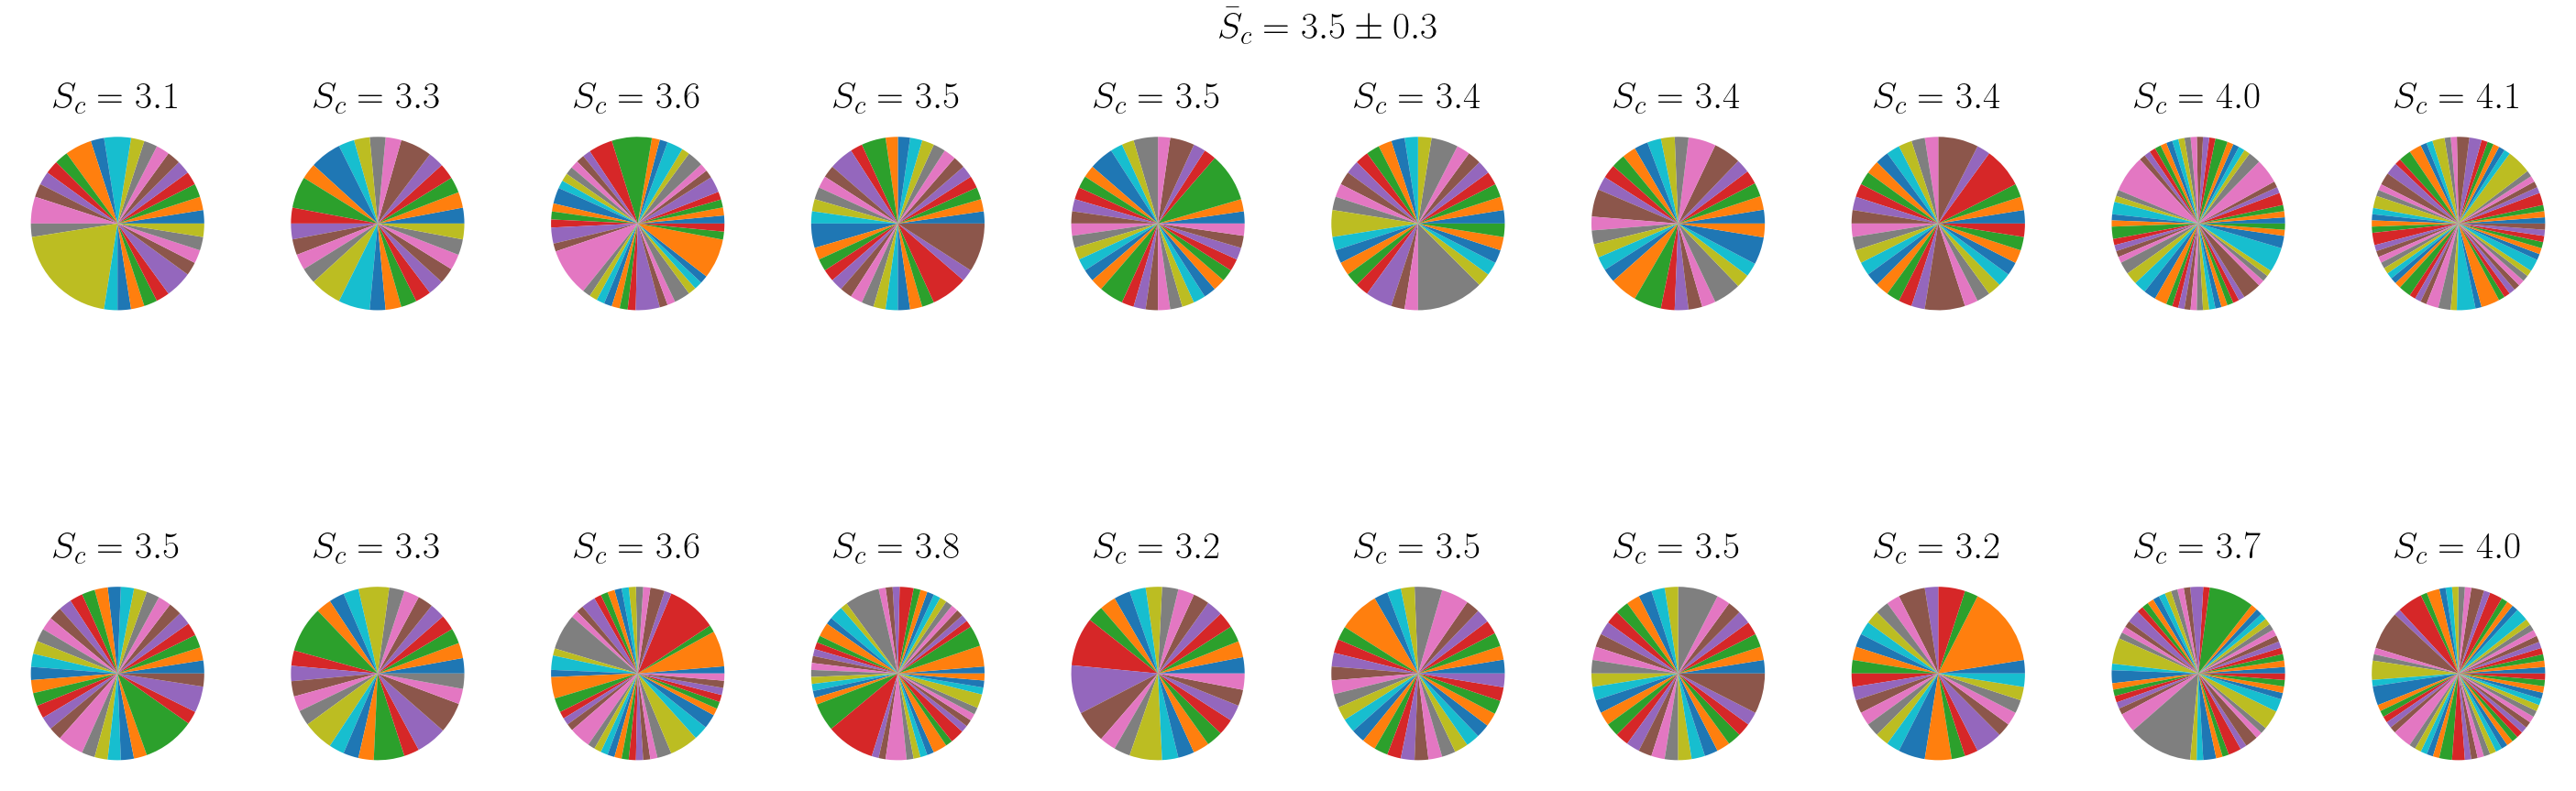

In [62]:
data_early = data.loc[(data['Figure']==1)]
mice = range(1, 11)
gcs = np.arange(1, 3)
fig, ax = plt.subplots(2, 10, figsize = (30, 10), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
S = []
L_act = []
for i, mouse in enumerate(mice):
    data_mouse = data_early.loc[data_early['Mouse']==mouse]
    for j, gc in enumerate(gcs):
        data_gc = data_mouse.loc[data_mouse['GC']==gc]
        CDR3, counts = np.unique(np.array((list(data_gc['CDR3:']))), return_counts = True)
        N = np.sum(counts)
        S_i = -np.sum((counts/N)*np.log((counts/N)))
        S.append(S_i)
        L_act.append(np.size(counts))
        if S_i != 0:
            ax[j, i].pie(counts)
            ax[j, i].set_title(r'$S_c=%.1f$'%(S_i), fontsize = 30)
        else:
            ax[j, i].axis('off')
            ax[j, i].text(x = .1, y = .6, s = r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
fig.suptitle(r'$\bar S_c = %.1f \pm %.1f$'%(np.mean(S), np.sqrt(np.var(S))), fontsize = 30)
fig.savefig('../../Figures/primary_immune_response/11_data_Victora/2020/clonal_entropy.pdf')


[ 0.02464589 -0.49038083]


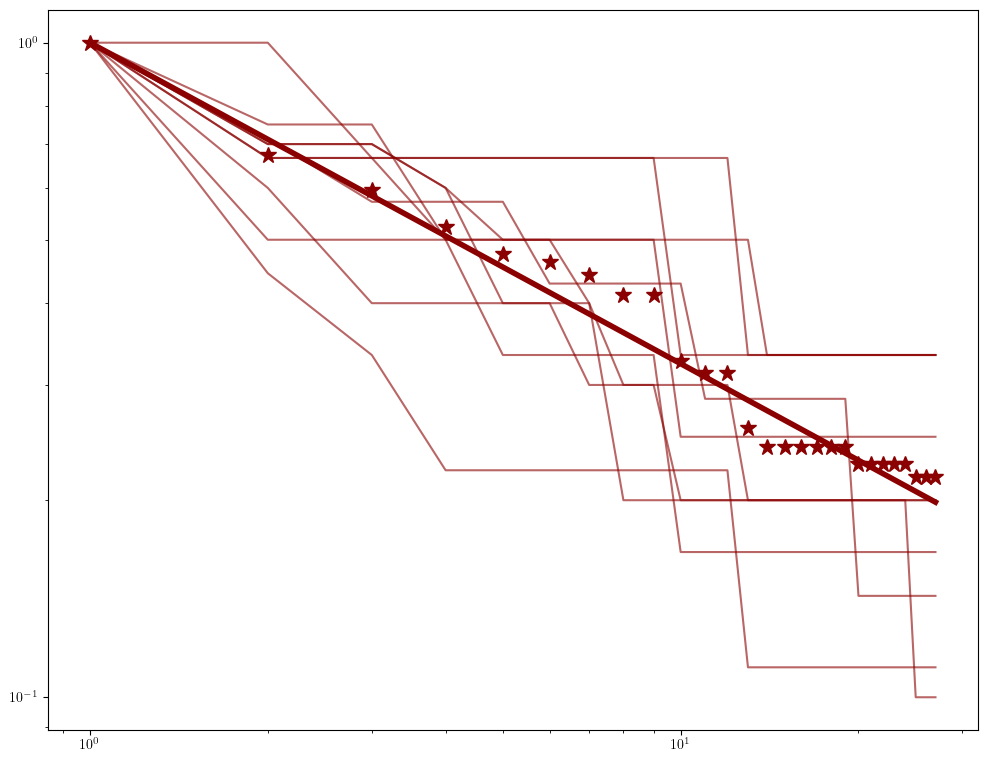

In [63]:
data_early = data.loc[(data['Figure']==1)]
mice = range(1, 11)
gcs = np.arange(1, 3)
clone_size_ranking = np.zeros(np.min(L_act))
fig, ax = plt.subplots(figsize = (10, 8), gridspec_kw={'left':0.02, 'right':.95, 'bottom':.05, 'top': 0.95}, edgecolor = 'black')
for i, mouse in enumerate(mice):
    data_mouse = data_early.loc[data_early['Mouse']==mouse]
    CDR3, counts = np.unique(np.array((list(data_mouse['CDR3:']))), return_counts = True)
    sorted_counts = np.flip(np.sort(counts))
    clone_size_ranking+=(sorted_counts[:27]/sorted_counts[0])/len(mice)
    ax.plot(range(1, np.min(L_act)+1), sorted_counts[:27]/sorted_counts[0], color = 'darkred', alpha = .6)
ax.plot(range(1, np.min(L_act)+1), clone_size_ranking, color = 'darkred', ls = '', marker = '*', ms = 12)

popt, pcov = curve_fit(f = my_linear_func, xdata = np.log(range(1, np.min(L_act)+1)), ydata = np.log(clone_size_ranking))
print(popt)

ax.plot(range(1, np.min(L_act)+1), np.arange(1, np.min(L_act)+1)**(popt[1]), ls = '-', lw = '4', color = 'darkred')
ax.set_yscale('log')
ax.set_xscale('log')
fig.savefig('../../Figures/primary_immune_response/11_data_Victora/2020/ranking.pdf')
